In [3]:
def data_analysis_pipeline():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, confusion_matrix
    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
    from sklearn.linear_model import LogisticRegression, Ridge
    from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
    from sklearn.svm import SVC, SVR
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    from sklearn.decomposition import PCA

    data_path = input("Please enter the path to your data file (CSV format): ")
    data = pd.read_csv(data_path)
    print("Data loaded successfully.")

    for col in data.select_dtypes(include=['object']).columns:
        data[col] = LabelEncoder().fit_transform(data[col])
    print("Data preprocessing (encoding) completed.")

    target_column = input("Please enter the name of the target column: ")

    # Ensure the target column exists
    if target_column not in data.columns:
        print(f"Error: '{target_column}' not found in the dataset.")
        return

    # Check unique values in the target column
    print(f"Unique values in '{target_column}': {data[target_column].unique()}")

    def eda(data):
        data = data.copy()
        imputer = SimpleImputer(strategy='mean')
        data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
        
        for col in data.columns:
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=data[col])
            plt.title(f'Boxplot for {col}')
            plt.show()
            plt.figure(figsize=(10, 4))
            sns.countplot(x=data[col])
            plt.title(f'Count Plot for {col}')
            plt.xticks(rotation=45)
            plt.show()

        plt.figure(figsize=(12, 8))
        sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()
        
        print("Exploratory Data Analysis completed.")

    def feature_engineering(data):
        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
        pca = PCA(n_components=2)
        pca_data = pca.fit_transform(data_scaled.drop(columns=[target_column]))
        plt.figure(figsize=(10, 6))
        plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data[target_column], cmap='viridis')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("PCA Scatter Plot")
        plt.show()
        print("Feature Engineering completed.")

    def model_training(data, target_column):
        X = data.drop(columns=[target_column])
        y = data[target_column]

        # Check the data type of y
        print(f"Data type of target variable '{target_column}': {y.dtype}")
        print(f"First few values of the target variable: {y.head()}")

        # Determine if the task is classification or regression
        if len(np.unique(y)) <= 2:  # Check for binary classification
            task_type = 'classification'
        elif len(np.unique(y)) > 2 and np.issubdtype(y.dtype, np.number):  # Multi-class or regression
            task_type = 'classification' if len(np.unique(y)) <= 20 else 'regression'
        else:
            task_type = 'regression'

        print(f"Task Type determined: {task_type}")

        models = {
            'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
            'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [5, 10, 15]}),
            'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}),
            'Support Vector Machine': (SVC(), {'C': [0.1, 1, 10]}),
            'Ridge Regression': (Ridge(), {'alpha': [0.1, 1, 10]}),
            'Decision Tree Regressor': (DecisionTreeRegressor(), {'max_depth': [5, 10, 15]}),
            'Random Forest Regressor': (RandomForestRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}),
            'Support Vector Regressor': (SVR(), {'C': [0.1, 1, 10]})
        }

        best_metric = float('-inf') if task_type == 'classification' else float('inf')
        best_model_name = ""
        best_model = None

        for model_name, (model, param_grid) in models.items():
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if task_type == 'classification':
                grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                y_pred = best_model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                print(f"{model_name} Accuracy: {accuracy:.4f}")

                if accuracy > best_metric:
                    best_metric = accuracy
                    best_model_name = model_name

                plt.figure(figsize=(10, 6))
                sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
                plt.title(f'Confusion Matrix for {best_model_name}')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()
                print(classification_report(y_test, y_pred))

            else:
                grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                y_pred = best_model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                print(f"{model_name} MSE: {mse:.4f}, R2 Score: {r2:.4f}")

                if mse < best_metric:  # Lower MSE is better
                    best_metric = mse
                    best_model_name = model_name

        print(f"\nBest Model: {best_model_name} with Metric: {best_metric:.4f}")

    # Call EDA, Feature Engineering, and Model Training
    eda(data)
    feature_engineering(data)
    model_training(data, target_column)



Please enter the path to your data file (CSV format):  Breast_Cancer.csv


Data loaded successfully.
Data preprocessing (encoding) completed.


Please enter the name of the target column:  Status


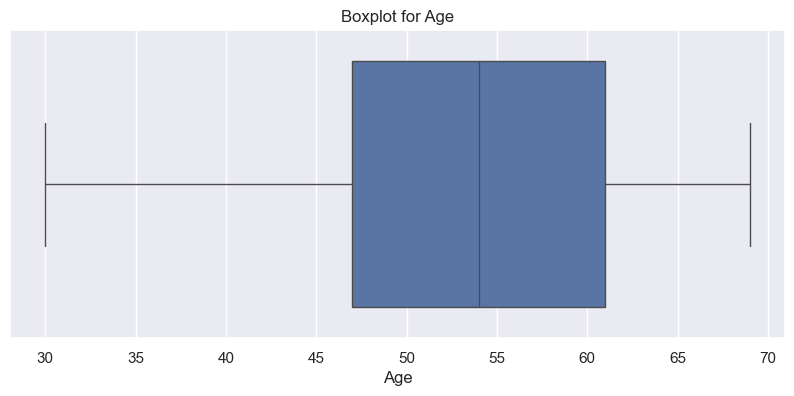

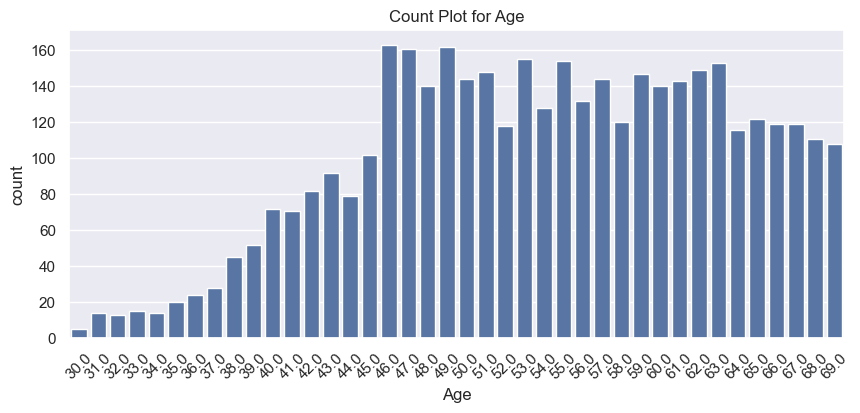

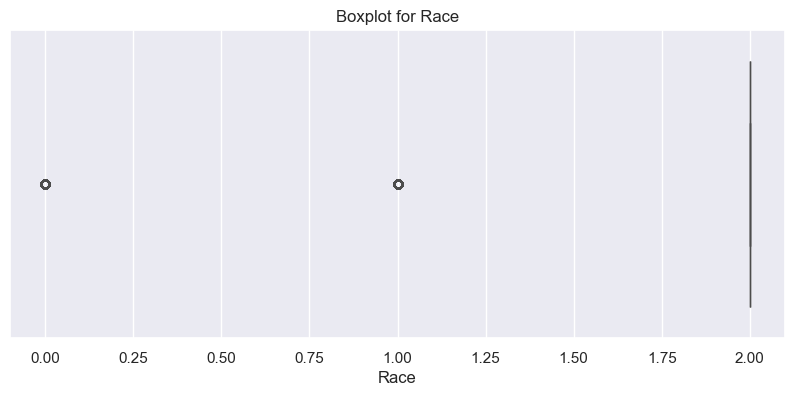

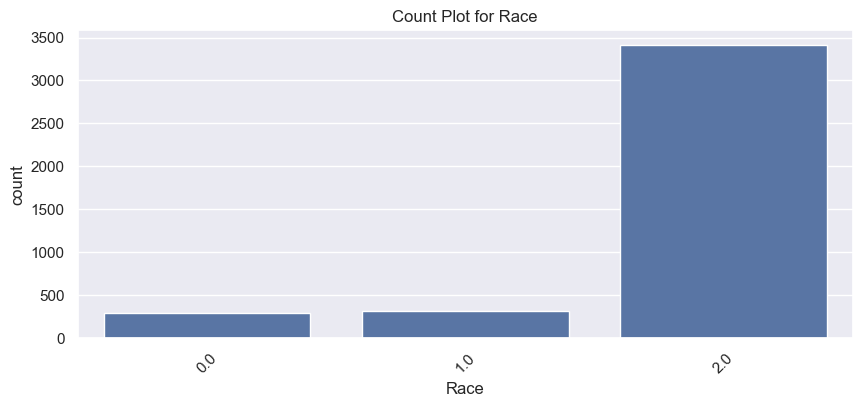

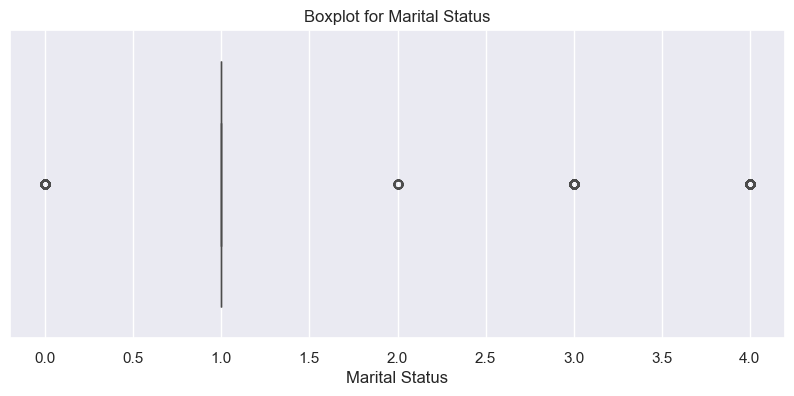

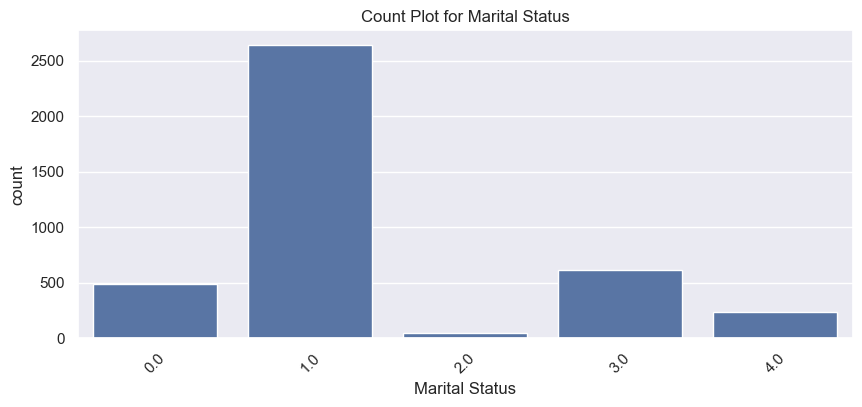

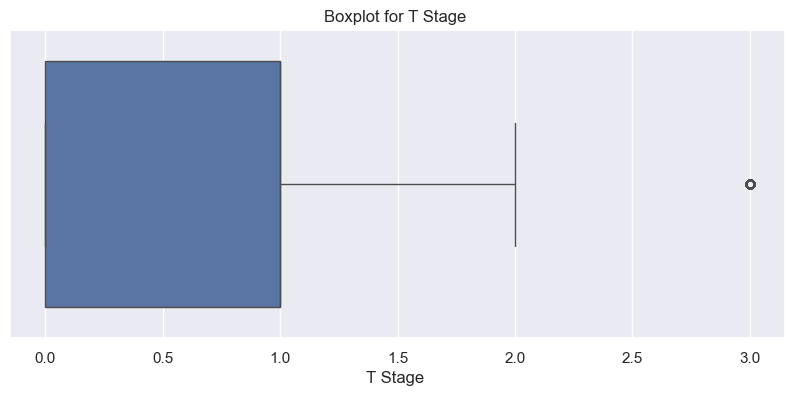

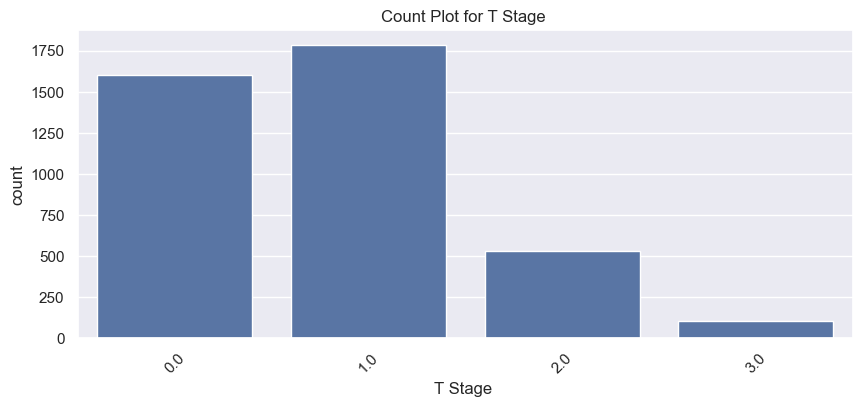

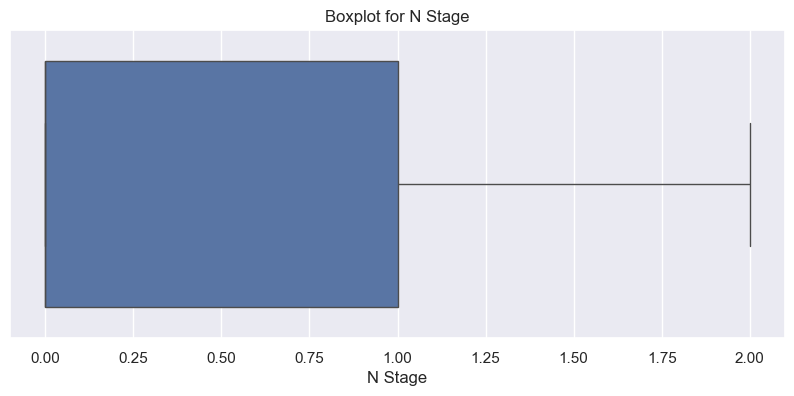

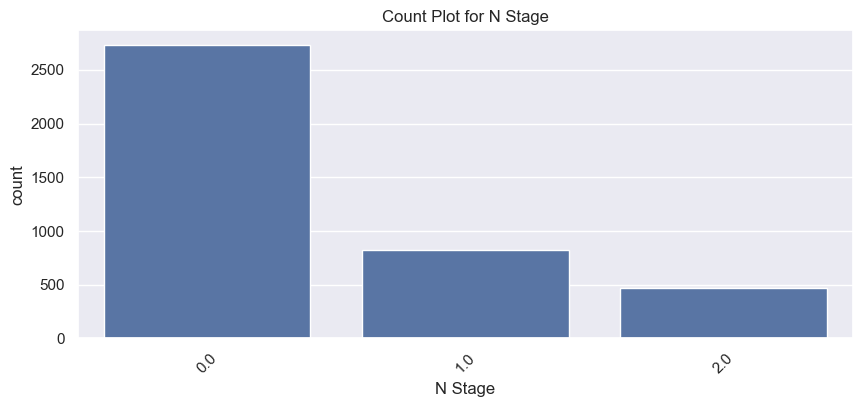

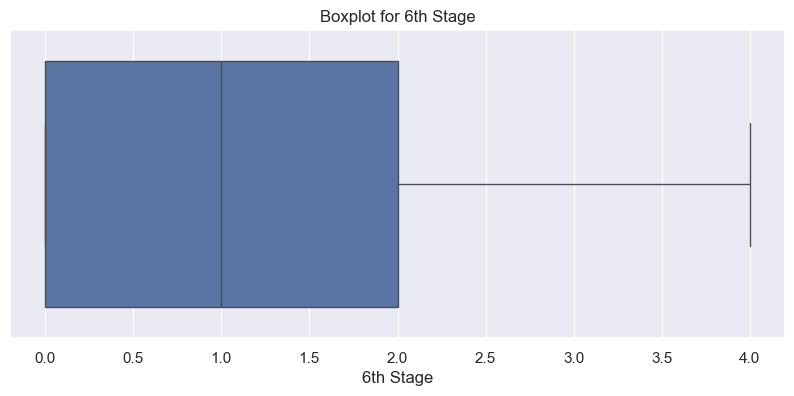

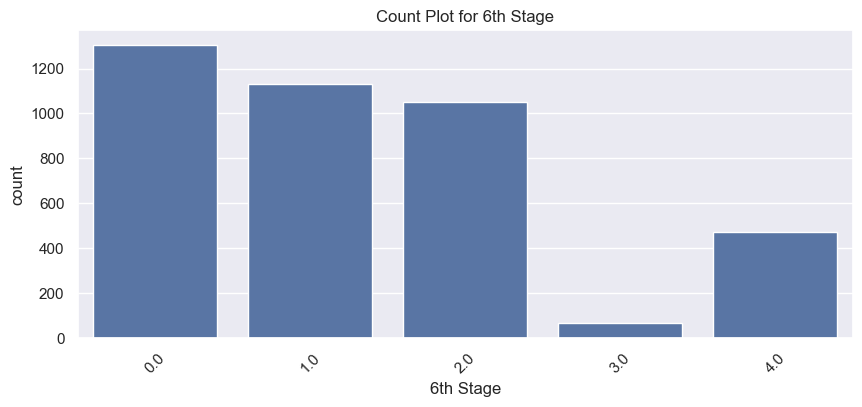

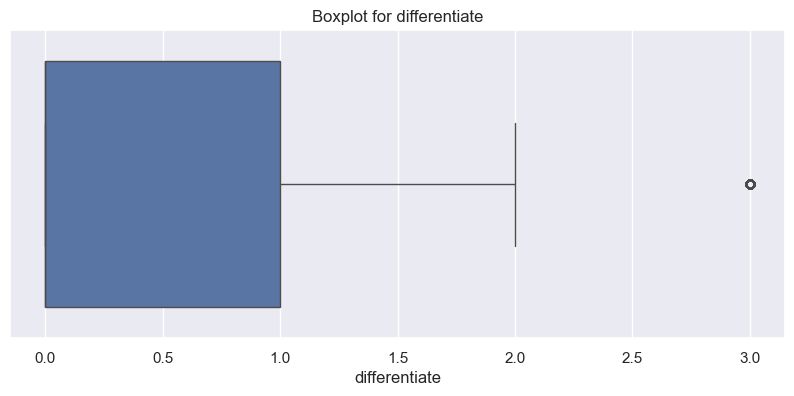

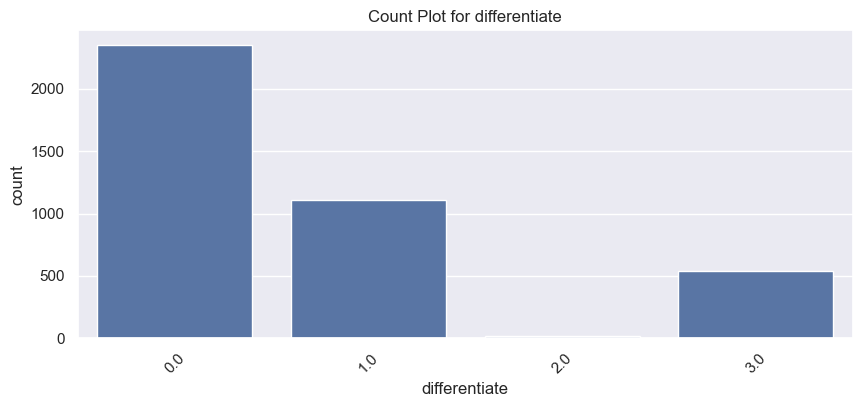

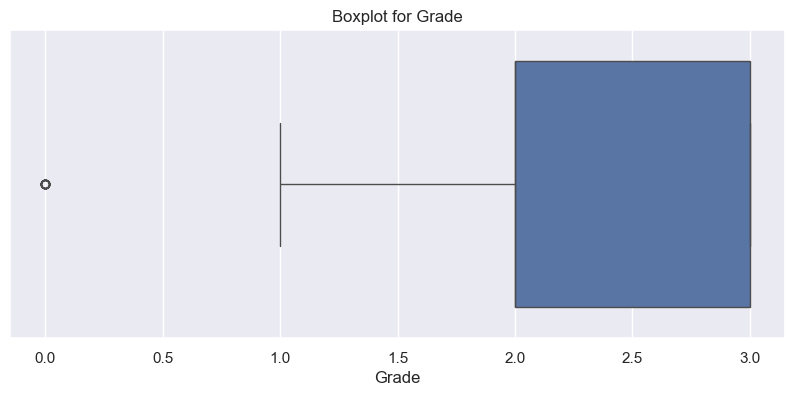

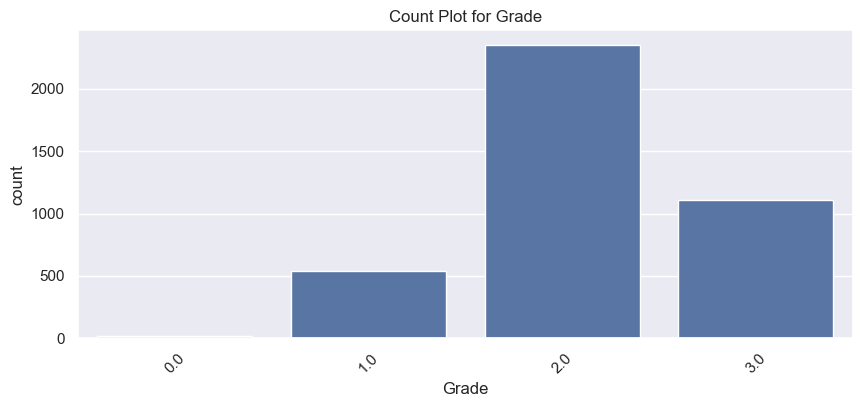

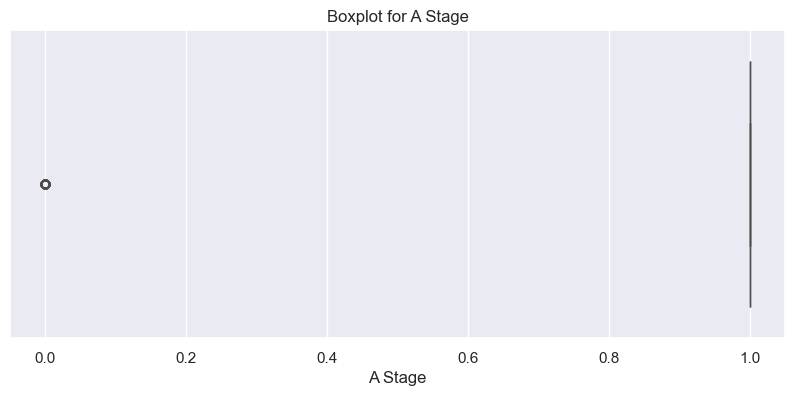

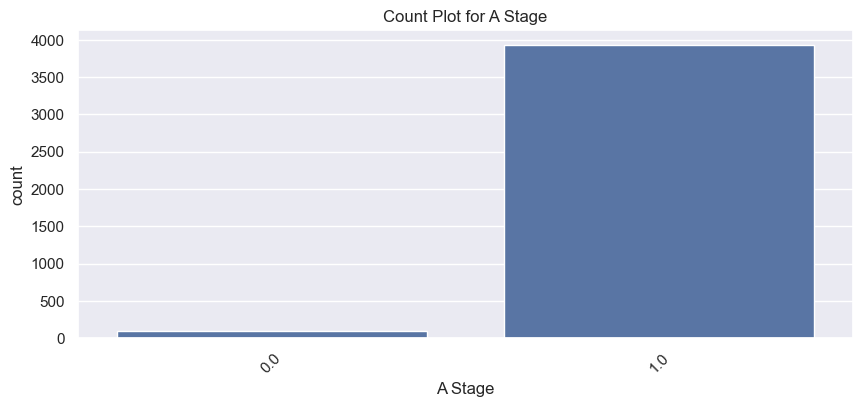

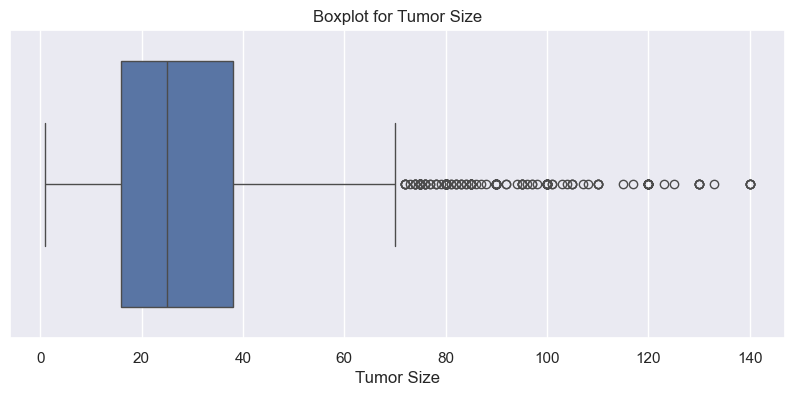

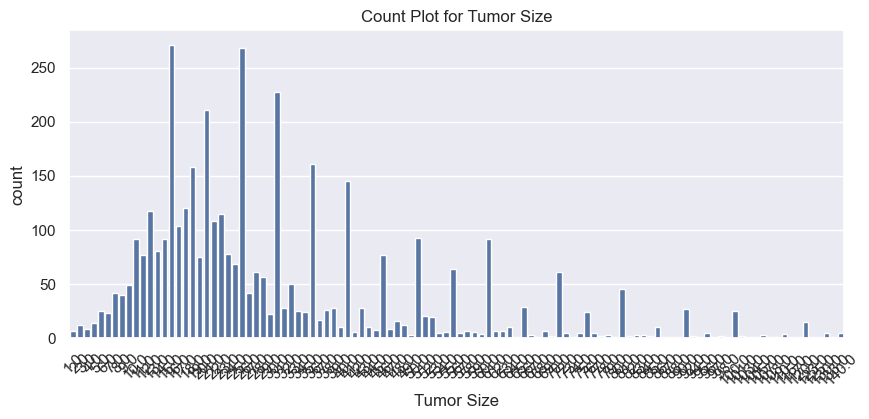

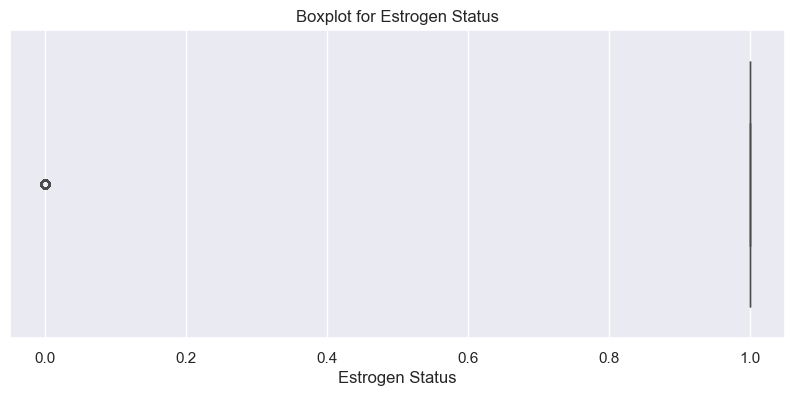

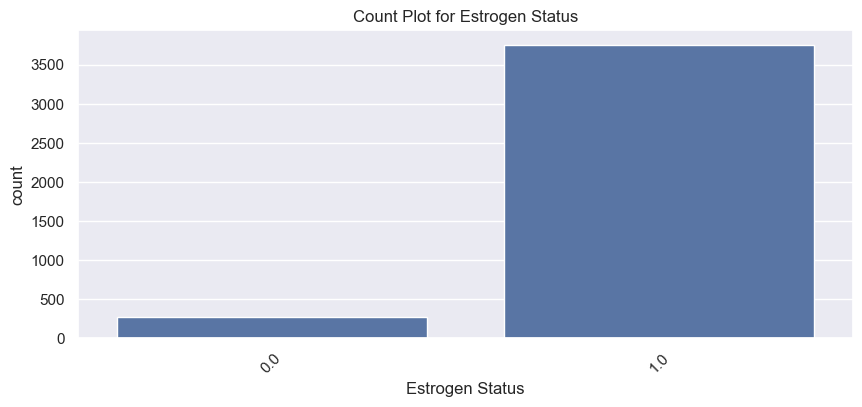

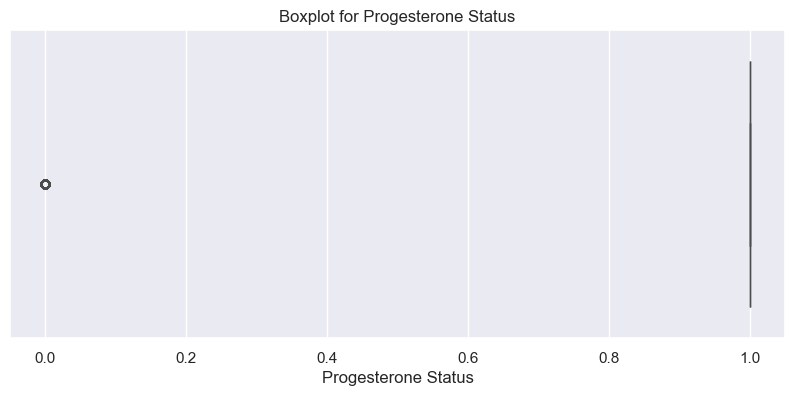

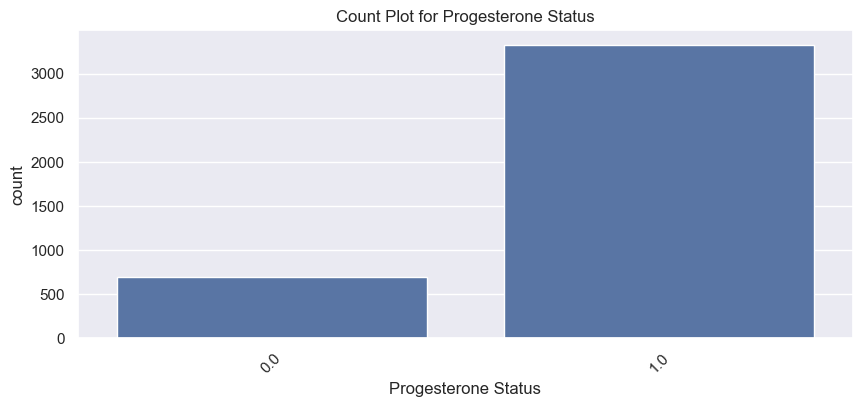

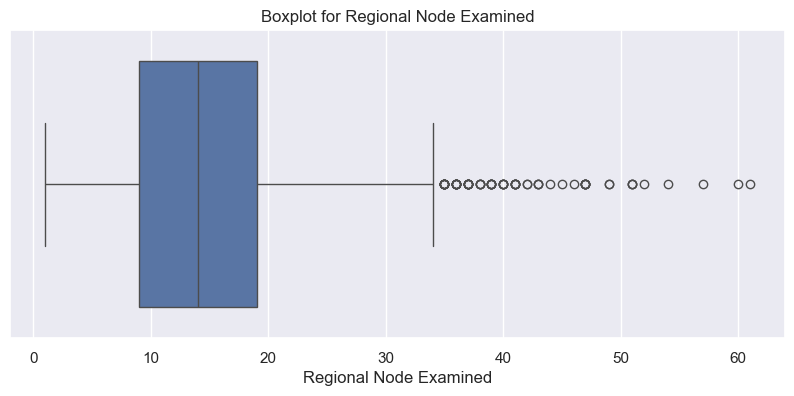

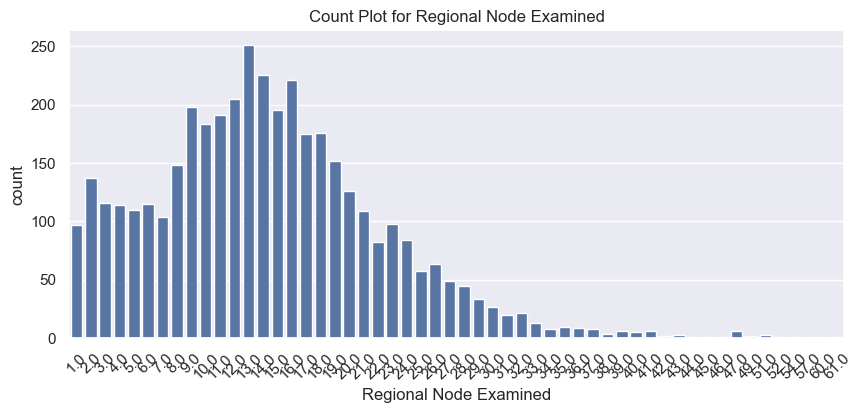

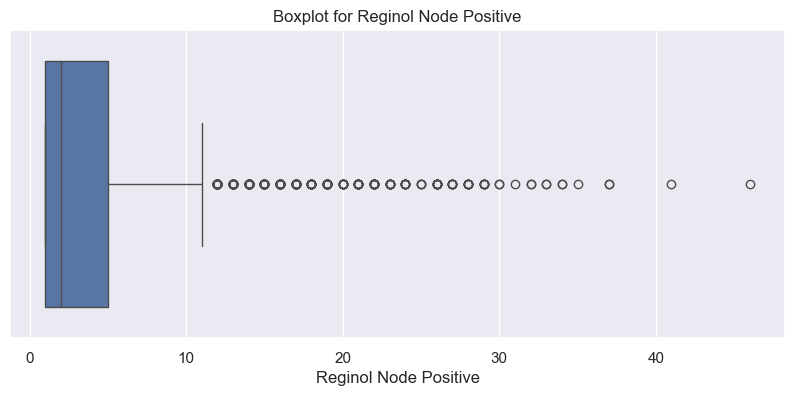

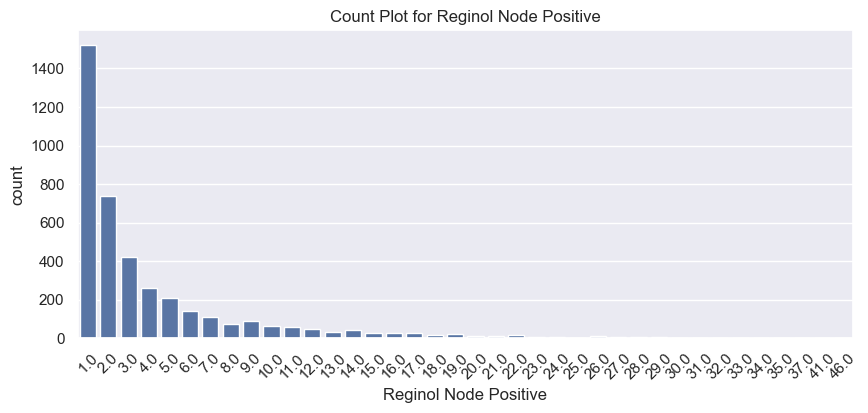

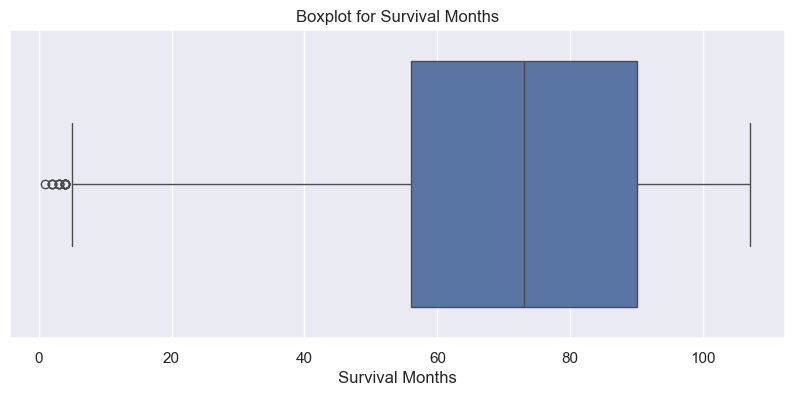

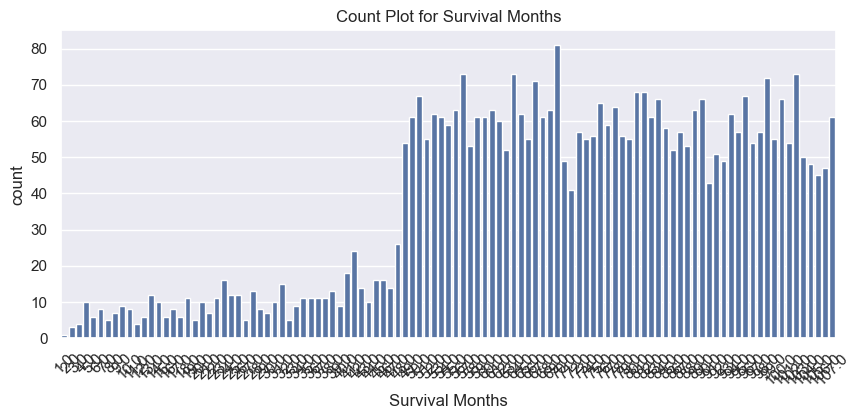

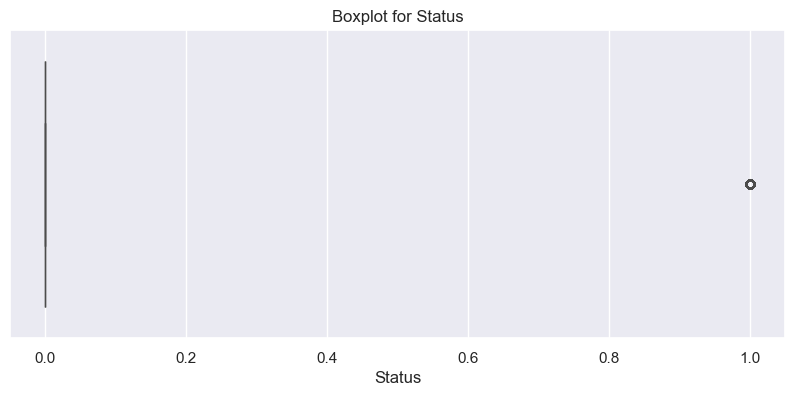

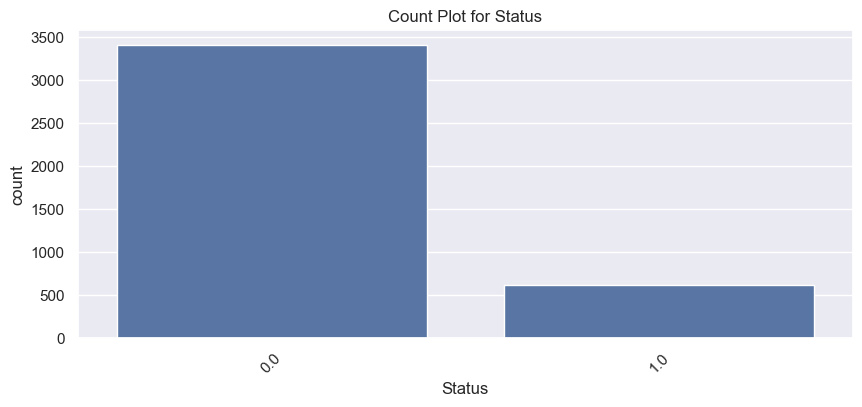

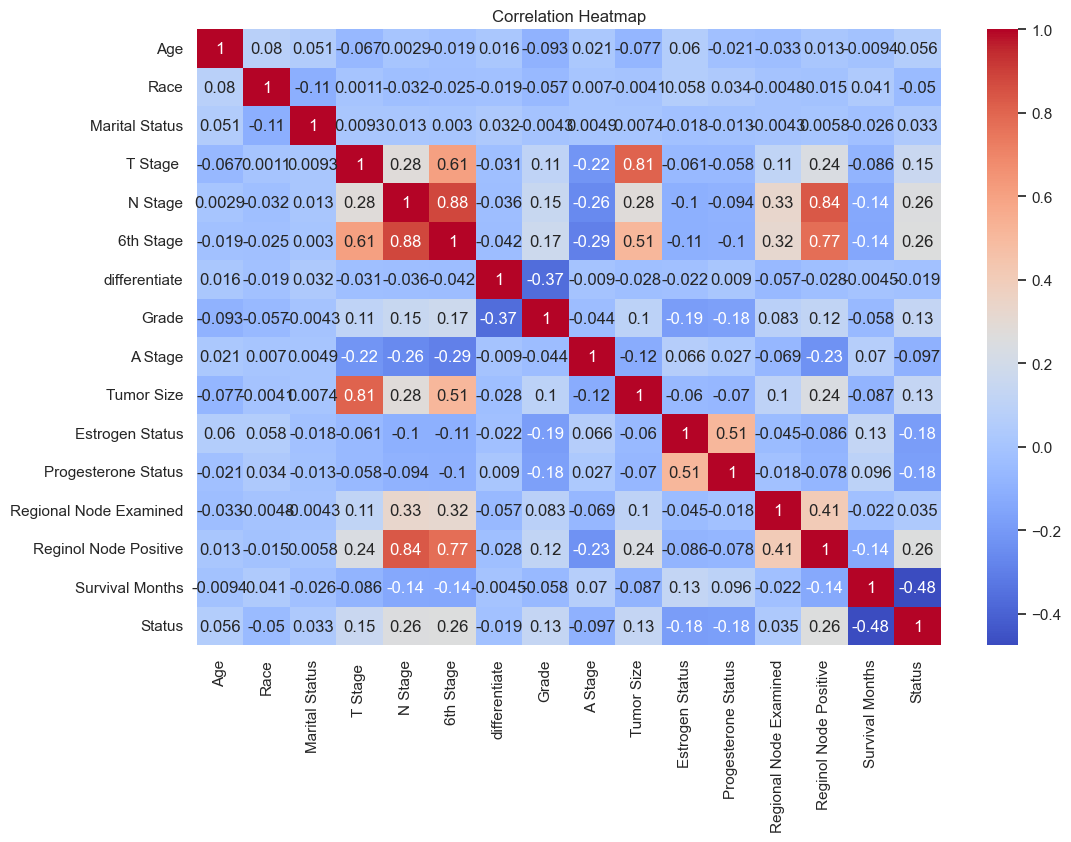

Exploratory Data Analysis completed.


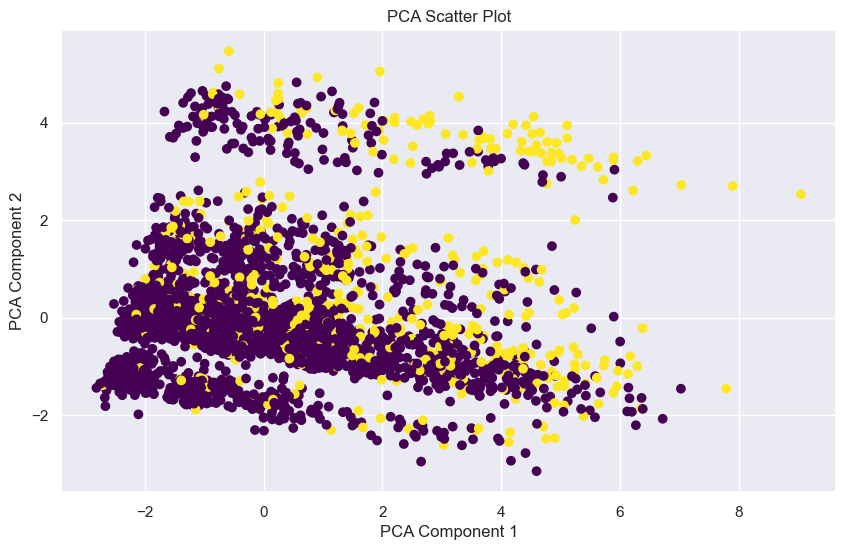

Feature Engineering completed.
Logistic Regression Accuracy: 0.9056


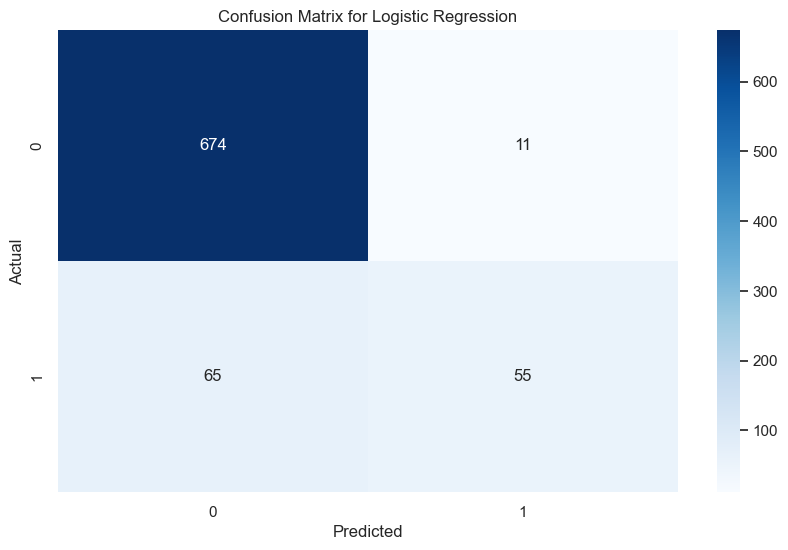

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       685
           1       0.83      0.46      0.59       120

    accuracy                           0.91       805
   macro avg       0.87      0.72      0.77       805
weighted avg       0.90      0.91      0.89       805

Decision Tree Accuracy: 0.9081


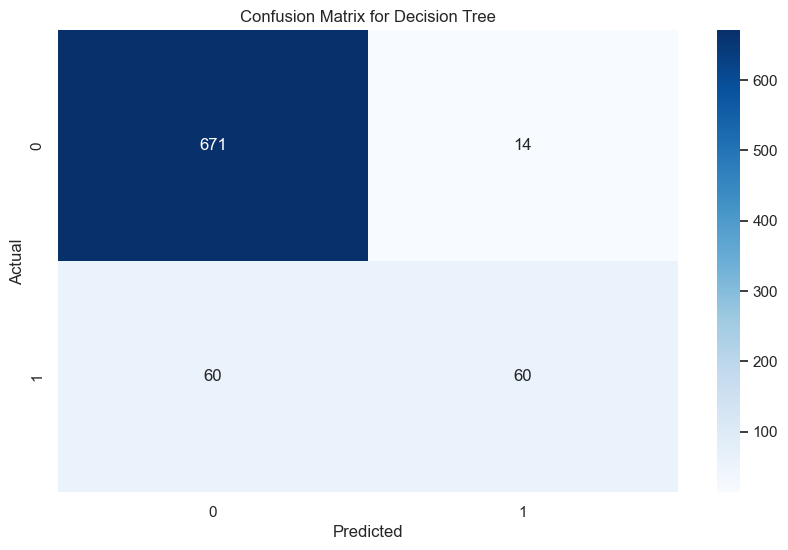

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.81      0.50      0.62       120

    accuracy                           0.91       805
   macro avg       0.86      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805

Random Forest Accuracy: 0.9130


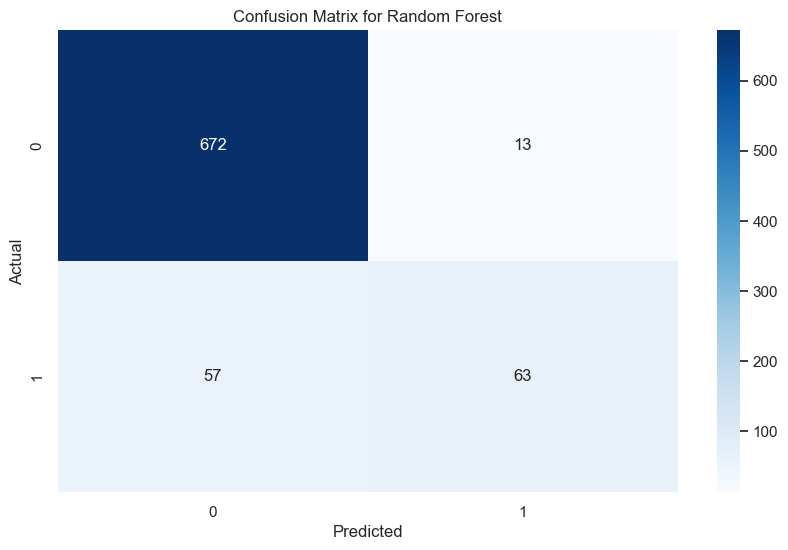

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.83      0.53      0.64       120

    accuracy                           0.91       805
   macro avg       0.88      0.75      0.80       805
weighted avg       0.91      0.91      0.90       805

Support Vector Machine Accuracy: 0.8957


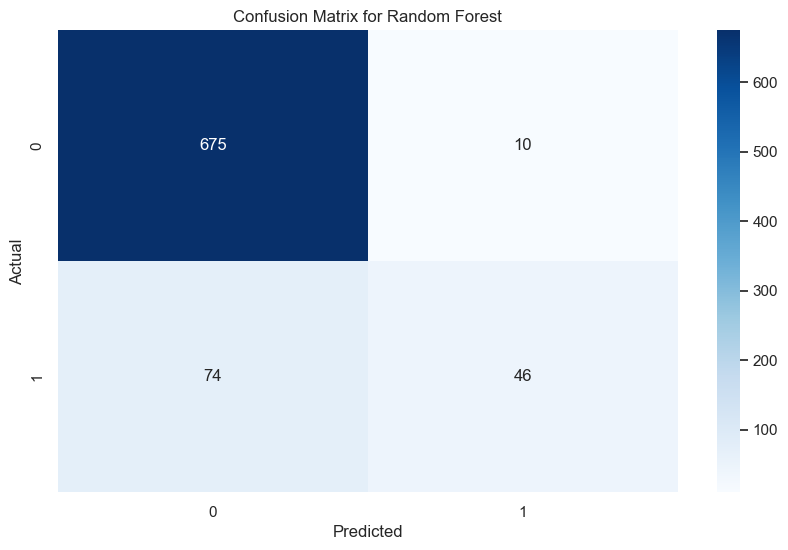

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       685
           1       0.82      0.38      0.52       120

    accuracy                           0.90       805
   macro avg       0.86      0.68      0.73       805
weighted avg       0.89      0.90      0.88       805



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [59]:
data_analysis_pipeline()